In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("StocksData.csv")

In [3]:
# read the data
df.head()

,STOCK_TICKER,High,Low,Open,Close,Volume,Adj Close
0,2019-01-02,137.509995,128.559998,128.990005,135.679993,28146200,135.679993
1,2019-01-03,137.169998,131.119995,134.690002,131.740005,22717900,131.740005
2,2019-01-04,138.000000,133.750000,134.009995,137.949997,29002100,137.949997
3,2019-01-07,138.869995,135.910004,137.559998,138.050003,20089300,138.050003
4,2019-01-08,143.139999,139.539993,139.889999,142.529999,26263800,142.529999


In [4]:
# check the column names
print(df.columns.tolist())

['STOCK_TICKER', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']


In [5]:
# check the shape of dataset
df.shape

(585, 7)

In [6]:
# use the info() method to get general information about the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   STOCK_TICKER  585 non-null    object 
 1   High          585 non-null    float64
 2   Low           585 non-null    float64
 3   Open          585 non-null    float64
 4   Close         585 non-null    float64
 5   Volume        585 non-null    int64  
 6   Adj Close     585 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 32.1+ KB


In [7]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,585.000000,585.000000,585.000000,585.000000,5.850000e+02,585.000000
mean,220.508496,214.720376,217.578684,217.687043,1.942099e+07,217.687043
std,45.256649,43.924553,44.595233,44.493801,9.571710e+06,44.493801
min,137.169998,128.559998,128.990005,131.740005,6.046300e+06,131.740005
25%,184.779999,180.889999,182.740005,182.580002,1.300770e+07,182.580002
50%,205.910004,201.570007,203.889999,204.410004,1.693040e+07,204.410004
75%,266.559998,259.149994,262.000000,262.339996,2.298270e+07,262.339996
max,315.880005,310.329987,314.850006,313.089996,7.723360e+07,313.089996


In [8]:
df.describe(include = ['object', 'bool'])

,STOCK_TICKER
count,585
unique,585
top,2020-12-30
freq,1


In [9]:
df['STOCK_TICKER'] = pd.to_datetime(df['STOCK_TICKER'])

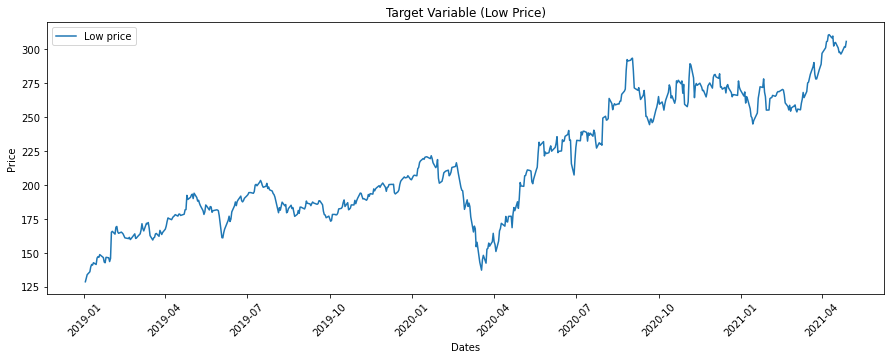

In [10]:
plt.figure(figsize=(15,5))
plt.plot(df.STOCK_TICKER,df.Low, label='Low price')
plt.title("Target Variable (Low Price)")
plt.xlabel("Dates")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# import methods for measuring errors
from sklearn.metrics import mean_squared_error, explained_variance_score, max_error, mean_absolute_error,mean_squared_log_error

In [12]:
df.columns

Index(['STOCK_TICKER', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [13]:
# let try to separate the dependent and independent variable
X = df[['High', 'Open', 'Close', 'Volume', 'Adj Close']]
y = df['Low']

Every dataset for Machine Learning model must be split into two separate sets – training set and test set.

Usually, the dataset is split into 70:30 ratio or 80:20 ratio. This means that you either take 70% or 80% of the data for training the model while leaving out the rest 30% or 20%. The splitting process varies according to the shape and size of the dataset in question.

In [14]:
# split the 20% data for testing and 80% for training
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [15]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (468, 5)
Training Labels Shape: (468,)
Testing Features Shape: (117, 5)
Testing Labels Shape: (117,)


In [16]:
# fit the linear model
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [17]:
# Evaluation of L
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = np.sqrt(mean_squared_error(y_test, predictions))
    variance_score = explained_variance_score(y_test,predictions)
    m_errors = max_error(y_test,predictions)
    mae = mean_absolute_error(y_test,predictions)
    log_errors = mean_squared_log_error(y_test,predictions)
    score = model.score(X_test,y_test)
    print("*"*50)
    print('\t\tModel Performance')
    print("*"*50)
    print("Score of: ",score)
    print("-"*50)
    print('RMSE of: ', errors)   
    print("-"*50)
    print('explained_variance_score of: ', variance_score)
    print("-"*50)
    print('Max_Error of: ', m_errors)
    print("-"*50)
    print('MAE of: ', mae)
    print("-"*50)
    print('MSLE of: ', log_errors)
    print("-"*50)
    return errors

In [18]:
# evalute the result of LinearRegression
evaluate(lr, X_test,y_test)

**************************************************
		Model Performance
**************************************************
Score of:  0.9991663983549685
--------------------------------------------------
RMSE of:  1.2502408392557312
--------------------------------------------------
explained_variance_score of:  0.9991767715430115
--------------------------------------------------
Max_Error of:  3.660252510974601
--------------------------------------------------
MAE of:  0.9449169019803134
--------------------------------------------------
MSLE of:  3.59474053455416e-05
--------------------------------------------------


1.2502408392557312

In [19]:
d = {
    'Actual low price':y_test,
    'predicted low price': lr.predict(X_test)
}

In [20]:
df1 = pd.DataFrame(d)
df1

,Actual low price,predicted low price
246,205.679993,204.285956
92,180.020004,181.342219
517,267.489990,267.511128
186,175.660004,176.731804
390,240.080002,240.659583
...,...,...
224,195.429993,196.061414
283,213.399994,213.327833
45,165.970001,166.322201
493,267.470001,271.130254


In [21]:
df1.head(50)

,Actual low price,predicted low price
246,205.679993,204.285956
92,180.020004,181.342219
517,267.489990,267.511128
186,175.660004,176.731804
390,240.080002,240.659583
103,177.160004,176.761891
508,264.779999,264.357061
14,143.059998,144.028109
52,160.820007,158.628538
498,264.630005,265.875540


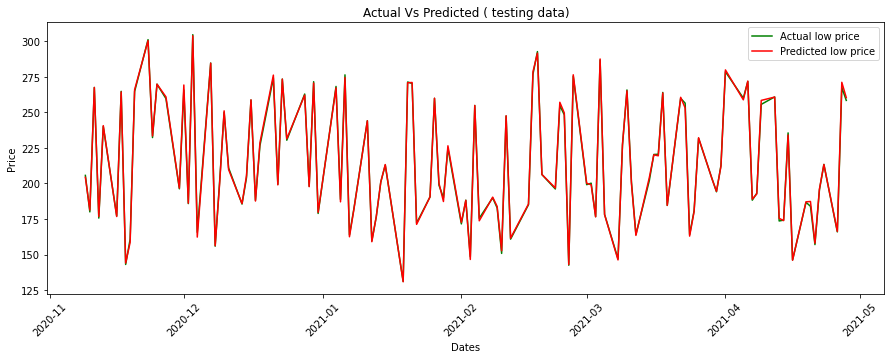

In [22]:
plt.figure(figsize=(15,5))
plt.plot(df['STOCK_TICKER'][468:],y_test, label='Actual low price', color='green')
plt.plot(df['STOCK_TICKER'][468:],lr.predict(X_test), label='Predicted low price', color='red')

plt.title("Actual Vs Predicted ( testing data)")
plt.xlabel("Dates")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.legend()
plt.show()